In [1]:
#!pip install gym
#!pip install pygame

In [76]:
import gym
import numpy as np

In [77]:
env = gym.make('CartPole-v1')

In [78]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
        #print('explore')
    else:
        action = np.argmax(Q[state])
        #print('exploit')
    return action

In [79]:
# def optimal_policy(state, Q):
#     action = np.argmax(Q[state])
#     return action

In [80]:
position_intervals = 0
angle_intervals = 45
angular_velocity_intervals = 45 # 90
velocity_intervals = 0

bins_position = np.linspace(-2.4, 2.4, position_intervals)
bins_angle = np.linspace(-0.21 , 0.21, angle_intervals)
bins_angular_velocity = np.linspace(-0.8 , 0.8, angular_velocity_intervals)
bins_velocity = np.linspace(-1 , 1, velocity_intervals)


In [81]:
def get_state(obs):
    d_position = int(np.digitize(obs[0], bins_position))
    d_angle = int(np.digitize(obs[2], bins_angle))
    d_angularVelocity = int(np.digitize(obs[3], bins_angular_velocity))
    d_cartVelocity = int(np.digitize(obs[1], bins_velocity))
    state = (d_position, d_cartVelocity, d_angle, d_angularVelocity)
    return state

In [82]:
state = get_state([-1.4, -2., -0.1, 1.2])
print(state)
print(bins_position)

(0, 0, 12, 45)
[]


In [83]:
Q = np.random.random((position_intervals + 1,velocity_intervals + 1,angle_intervals + 1,angular_velocity_intervals + 1,2))
print(Q)

[[[[[0.02626991 0.82663862]
    [0.75042972 0.90048593]
    [0.16789537 0.92303356]
    ...
    [0.35991169 0.5013551 ]
    [0.31848528 0.81132684]
    [0.11858455 0.65765256]]

   [[0.96390661 0.03485494]
    [0.75712211 0.64196496]
    [0.84489076 0.54086883]
    ...
    [0.43150912 0.51295111]
    [0.99998901 0.04474276]
    [0.53553177 0.06521219]]

   [[0.46589655 0.18014531]
    [0.52379129 0.56260838]
    [0.30071884 0.26501165]
    ...
    [0.86956971 0.93684174]
    [0.89523584 0.74754171]
    [0.63486507 0.22633621]]

   ...

   [[0.97196933 0.19170173]
    [0.26622629 0.17990992]
    [0.36011404 0.02100318]
    ...
    [0.53168459 0.83162206]
    [0.32407048 0.15322185]
    [0.37303206 0.51900746]]

   [[0.37022626 0.21186941]
    [0.8874624  0.7682908 ]
    [0.92865933 0.65252297]
    ...
    [0.97283973 0.34994519]
    [0.32241591 0.74082036]
    [0.89464212 0.79545655]]

   [[0.59645205 0.86452056]
    [0.71175982 0.66843667]
    [0.9734929  0.40876719]
    ...
    [0.017

In [84]:
def update_Q(Q , state, action, reward, next_state, alpha, gamma):
    Q[state][action] = Q[state][action] + alpha*(reward + gamma*(np.max(Q[next_state])) - Q[state][action])


In [85]:
def play_one_iteration(Q, gamma, alpha, epsilon, render=True):
    obs = env.reset()
    #print(obs)
    done = False
    count_actions = 0
    while not done:
        state = get_state(obs)
        action = epsilon_greedy_policy(state, Q, epsilon)
        obs, reward, done, info = env.step(action)
        if render:
            env.render()
        update_Q(Q, state, action, reward, get_state(obs), alpha, gamma)
        #print('->', state, action, reward, obs, done, info)
        count_actions += 1
    return Q, count_actions

In [86]:
def get_initials_states():
    # all values start with a random value betwee -0.05 and 0.05
    min_states = get_state([-0.05, -0.05, -0.05, -0.05])
    max_states = get_state([0.05, 0.05, 0.05, 0.05])
    return list(zip(min_states, max_states))

def get_Q_mean_initals_states(Q):
    min_max_initials_states = get_initials_states()
    return np.mean(Q[min_max_initials_states[0][0]:min_max_initials_states[0][1]+1, min_max_initials_states[1][0]:min_max_initials_states[1][1]+1, min_max_initials_states[2][0]:min_max_initials_states[2][1]+1, min_max_initials_states[3][0]:min_max_initials_states[3][1]+1])

print(get_initials_states())
min_max_initials_states = get_initials_states()
print(min_max_initials_states[0][0],min_max_initials_states[0][1], min_max_initials_states[1][0],type(min_max_initials_states[1][1]))
print(Q[min_max_initials_states[0][0]:min_max_initials_states[0][1]+1, min_max_initials_states[1][0]:min_max_initials_states[1][1]+1, min_max_initials_states[2][0]:min_max_initials_states[2][1]+1, min_max_initials_states[3][0]:min_max_initials_states[3][1]+1].shape)
np.mean(Q[min_max_initials_states[0][0]:min_max_initials_states[0][1]+1, min_max_initials_states[1][0]:min_max_initials_states[1][1]+1, min_max_initials_states[2][0]:min_max_initials_states[2][1]+1, min_max_initials_states[3][0]:min_max_initials_states[3][1]+1])

[(0, 0), (0, 0), (17, 28), (21, 24)]
0 0 0 <class 'int'>
(1, 1, 12, 4, 2)


0.4731524027673384

In [87]:
results = {
    "mean_actions" : [],
    "max_actions" : [],
    "mean_initial_q" : [],
    "max_initial_q" : [],
    "mean_mean_q" : [],
    "max_mean_q" : [],
    "mean_q_init_state": [],
}
gamma = 0.99
alpha = 0.7
epsilon = 0.9
for i in range(50):
    # count_number_actions_list = []
    for game in range(100):
        Q, count_actions = play_one_iteration(Q, gamma, alpha, epsilon, render=True)
        # count_number_actions_list.append(count_actions)
    

    # exploit iteration:
    count_number_actions_list = []
    q_list = []
    q_median = []
    for game in range(10):
        Q, count_actions = play_one_iteration(Q, gamma, alpha, epsilon=0, render=True)
        q_list.append(Q[get_state([0,0,0,0])])
        q_median.append(np.mean(Q))
        count_number_actions_list.append(count_actions)
    
    if(i%2 == 0 and i !=0):
        epsilon -= 0.02
    print(f"Number of iterations {i}")
    print(f"Mean value of number of actions = {np.mean(count_number_actions_list)}")
    print(f"Max value of number of actions = {np.max(count_number_actions_list)}")
    print(f"Mean value of initial state Q = {np.mean(q_list)}")
    print(f"Max value of initial state Q = {np.max(q_list)}")
    print(f"Mean value of mean of Q = {np.mean(q_median)}")
    print(f"Max value of mean of Q = {np.max(q_median)}")
    print(f"Mean value of Q initials states Q = {get_Q_mean_initals_states(Q)}")
    print("--------------------------------------------")
    print("")

    results["mean_actions"].append(np.mean(count_number_actions_list))
    results["max_actions"].append(np.max(count_number_actions_list))
    results["mean_initial_q"].append(np.mean(q_list))
    results["max_initial_q"].append(np.max(q_list))
    results["mean_mean_q"].append(np.mean(q_median))
    results["max_mean_q"].append(np.max(q_median))
    results["mean_q_init_state"].append(get_Q_mean_initals_states(Q))






Number of iterations 0
Mean value of number of actions = 13.4
Max value of number of actions = 20
Mean value of initial state Q = 4.936095023721082
Max value of initial state Q = 6.880272605147388
Mean value of mean of Q = 0.9664514420324795
Max value of mean of Q = 0.9745180661208483
Mean value of Q initials states Q = 2.865427038217277
--------------------------------------------

Number of iterations 1
Mean value of number of actions = 20.1
Max value of number of actions = 36
Mean value of initial state Q = 10.878164470911532
Max value of initial state Q = 13.076007861734839
Mean value of mean of Q = 1.4732141625610091
Max value of mean of Q = 1.4827645843860342
Mean value of Q initials states Q = 5.849496103830716
--------------------------------------------

Number of iterations 2
Mean value of number of actions = 28.6
Max value of number of actions = 103
Mean value of initial state Q = 14.647648868972396
Max value of initial state Q = 18.312334150687292
Mean value of mean of Q = 

KeyboardInterrupt: 

In [104]:
Q, count_actions = play_one_iteration(Q, gamma, alpha, epsilon=0, render=True)
print(count_actions)

500


In [98]:
# media de Q, Min Q, Max Q
np.mean(Q)
print(results)

{'mean_actions': [13.4, 20.1, 28.6, 54.1, 258.0, 354.8, 361.1, 476.9, 500.0, 262.6, 335.3, 500.0, 451.6, 433.3, 500.0, 405.7, 461.0, 434.9, 370.9, 500.0, 500.0, 452.0, 500.0, 500.0, 500.0, 500.0, 500.0], 'max_actions': [20, 36, 103, 156, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500], 'mean_initial_q': [4.936095023721082, 10.878164470911532, 14.647648868972396, 26.22881790461745, 54.65238985601356, 64.87472579619221, 81.92642478760516, 86.16471721711063, 84.0328054853931, 84.80460020649382, 90.26380551445641, 96.86322244721434, 97.34591448535566, 96.45097798402642, 98.0358718022153, 98.9040912785542, 99.45014316771264, 99.00017824436839, 97.71342384065255, 98.19565877981805, 99.30467863988204, 99.18068902474309, 99.3814265110428, 99.74512062868443, 99.92292119883722, 99.96215746944168, 99.98819790893776], 'max_initial_q': [6.880272605147388, 13.076007861734839, 18.312334150687292, 33.43542663756765, 79.06542714524187, 

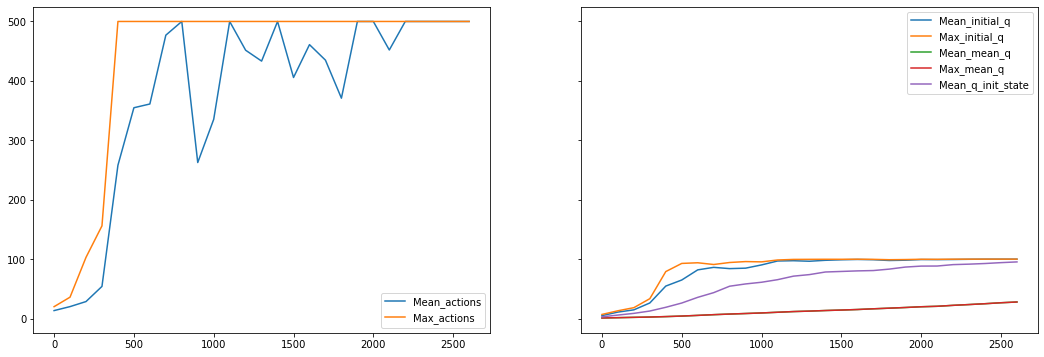

{'mean_actions': [13.4, 20.1, 28.6, 54.1, 258.0, 354.8, 361.1, 476.9, 500.0, 262.6, 335.3, 500.0, 451.6, 433.3, 500.0, 405.7, 461.0, 434.9, 370.9, 500.0, 500.0, 452.0, 500.0, 500.0, 500.0, 500.0, 500.0], 'max_actions': [20, 36, 103, 156, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500], 'mean_initial_q': [4.936095023721082, 10.878164470911532, 14.647648868972396, 26.22881790461745, 54.65238985601356, 64.87472579619221, 81.92642478760516, 86.16471721711063, 84.0328054853931, 84.80460020649382, 90.26380551445641, 96.86322244721434, 97.34591448535566, 96.45097798402642, 98.0358718022153, 98.9040912785542, 99.45014316771264, 99.00017824436839, 97.71342384065255, 98.19565877981805, 99.30467863988204, 99.18068902474309, 99.3814265110428, 99.74512062868443, 99.92292119883722, 99.96215746944168, 99.98819790893776], 'max_initial_q': [6.880272605147388, 13.076007861734839, 18.312334150687292, 33.43542663756765, 79.06542714524187, 

In [102]:
import matplotlib.pyplot as plt
x = list(range(0, len(results['mean_actions'])*100, 100))
# fig, ax = plt.subplots()
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
axs[0].plot(x, results['mean_actions'], label="Mean_actions")
axs[0].plot(x, results['max_actions'], label="Max_actions")
axs[0].legend()

axs[1].plot(x, results['mean_initial_q'], label="Mean_initial_q")
axs[1].plot(x, results['max_initial_q'], label="Max_initial_q")
axs[1].plot(x, results['mean_mean_q'], label="Mean_mean_q")
axs[1].plot(x, results['max_mean_q'], label="Max_mean_q")
axs[1].plot(x, results['mean_q_init_state'], label="Mean_q_init_state")
axs[1].legend()

plt.show()


print(results)

In [108]:
np.save("Q.npy", Q)
# d = np.load("Q.npy")
# d == Q


array([[[[[ True,  True],
          [ True,  True],
          [ True,  True],
          ...,
          [ True,  True],
          [ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True],
          [ True,  True],
          ...,
          [ True,  True],
          [ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True],
          [ True,  True],
          ...,
          [ True,  True],
          [ True,  True],
          [ True,  True]],

         ...,

         [[ True,  True],
          [ True,  True],
          [ True,  True],
          ...,
          [ True,  True],
          [ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True],
          [ True,  True],
          ...,
          [ True,  True],
          [ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True],
          [ True,  True],
          ...,
          [ True,  True],
 